### Michael wk3 -> Nina wk2

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from rich import print
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

cwd = os.path.join(os.getcwd(), 'data')
result_path = os.path.join(os.getcwd(), 'results')

### Load data:

In [6]:
# load dataframe
df_michael = pd.read_excel(os.path.join(cwd, 'week3', 'labeled', 'michael_wk3.xls'))
df_nina = pd.read_excel(os.path.join(cwd, 'week2', 'labeled', 'nina_wk2.xls'))

In [7]:
df_michael

,encoded_unique_ticker_ts,rid,text,question,response,label,note
0,55732,462688,Do you think it's going to be fairly rapid mov...,"Very much understood, that's very helpful. Whe...","Steven, it is Armando. I think the first thing...",0,Little skepticism as the questions is seemingl...
1,72687,263798,"So fundamentally, longer-term, this mid single...","So fundamentally, longer-term, this mid single...",It is. We're not giving up on that.,1,Implications that the growth may not be suista...
2,49838,585266,I appreciate your thoughts on the recent perfo...,Hi. Good afternoon. Most of my questions have ...,"Hi. It?? Craig. I??l take that. First of all, ...",0,Question seems genuine as the individual is ju...
3,17604,268429,"But once you get to 2017, once you've delivere...","John, you've done a -- you've obviously got a ...","Well, I guess I?? say volume has always been a...",0,Not as much skepticism as curiosity of how fir...
4,15426,1021577,And then in terms of the capital spending leve...,Yeah that makes sense. And then in terms of th...,"The capital spending in Horizon, you are talki...",0,Seems to be a genuine question.
...,...,...,...,...,...,...,...
195,15452,101445,With the free cash flow being quite strong and...,"Yes, good morning, guys. Just a question on th...","Yes, it?? a good question. I would offer a cou...",0,Question driven more by curiosity than skepticism
196,35580,874111,I guess last quarter you had said that you fel...,"Got it. Okay, great. Last quick one here. Just...",I don't think anything has changed from what I...,1,May be some skepticism on revenue expectations
197,52633,307473,And how confident are you that they???re not g...,If you look at most of your states that they g...,So Peter we always have higher cost from the n...,1,Predicting higher costs can be reflective of u...
198,88151,1291498,You guys have indicated that you were going to...,And so last question is just kind of a houseke...,"Currently, that in-house is still undergoing, ...",0,Question driven more by curiosity than skepticism


In [8]:
df_nina

,encoded_unique_ticker_ts,rid,text,question,response,label,note
0,55732,462688,Do you think it's going to be fairly rapid mov...,"Very much understood, that's very helpful. Whe...","Steven, it is Armando. I think the first thing...",0.0,NaN
1,72687,263798,"So fundamentally, longer-term, this mid single...","So fundamentally, longer-term, this mid single...",It is. We're not giving up on that.,0.0,NaN
2,49838,585266,I appreciate your thoughts on the recent perfo...,Hi. Good afternoon. Most of my questions have ...,Hi. It‚Äôs Craig. I‚Äôll take that. First of a...,0.0,NaN
3,17604,268429,"But once you get to 2017, once you've delivere...","John, you've done a -- you've obviously got a ...","Well, I guess I‚Äôd say volume has always been...",0.0,NaN
4,15426,1021577,And then in terms of the capital spending leve...,Yeah that makes sense. And then in terms of th...,"The capital spending in Horizon, you are talki...",0.0,NaN
...,...,...,...,...,...,...,...
195,15452,101445,With the free cash flow being quite strong and...,"Yes, good morning, guys. Just a question on th...","Yes, it‚Äôs a good question. I would offer a c...",0.0,NaN
196,35580,874111,I guess last quarter you had said that you fel...,"Got it. Okay, great. Last quick one here. Just...",I don't think anything has changed from what I...,0.0,NaN
197,52633,307473,And how confident are you that they√¢¬Ä¬ôre no...,If you look at most of your states that they g...,So Peter we always have higher cost from the n...,1.0,skeptical that rates might get raised
198,88151,1291498,You guys have indicated that you were going to...,And so last question is just kind of a houseke...,"Currently, that in-house is still undergoing, ...",1.0,skeptical if groups will actually condense


### Check nan:

In [12]:
np.all(df_michael['rid'] == df_nina['rid'])

True

In [9]:
# check nan: michael
print(df_michael.iloc[:, 5].isnull().sum())
print(np.argmax(df_michael.iloc[:, 5].isnull()))

0

0

In [11]:
# check nan: michael
print(df_nina.iloc[:, 5].isnull().sum())
print(np.argmax(df_nina.iloc[:, 5].isnull()))
print(df_nina.iloc[127, :])

1

127

encoded_unique_ticker_ts                                                88279
rid                                                                    109352
text                        You did $15 million this quarter, does it mean...
question                    Two follow-ups. One on the buybacks. You did $...
response                    We are on track, so it just happened when we s...
label                                                                     NaN
note                                                                      NaN
Name: 127, dtype: object

In [15]:
# drop
df_michael = df_michael[df_michael['rid'] != 109352].copy()
df_nina = df_nina[df_nina['rid'] != 109352].copy()

In [17]:
print(df_michael.iloc[:, 5].isnull().sum())
print(np.argmax(df_michael.iloc[:, 5].isnull()))
print(df_nina.iloc[:, 5].isnull().sum())
print(np.argmax(df_nina.iloc[:, 5].isnull()))

0

0

0

0

### Merge df:

In [19]:
merge_df = pd.merge(df_michael[['rid', 'text', 'label']], df_nina[['rid', 'label']], on='rid', suffixes=('_michael', '_nina'))
merge_df['label_nina'] = merge_df['label_nina'].astype(int)
merge_df

,rid,text,label_michael,label_nina
0,462688,Do you think it's going to be fairly rapid mov...,0,0
1,263798,"So fundamentally, longer-term, this mid single...",1,0
2,585266,I appreciate your thoughts on the recent perfo...,0,0
3,268429,"But once you get to 2017, once you've delivere...",0,0
4,1021577,And then in terms of the capital spending leve...,0,0
...,...,...,...,...
194,101445,With the free cash flow being quite strong and...,0,0
195,874111,I guess last quarter you had said that you fel...,1,0
196,307473,And how confident are you that they???re not g...,1,1
197,1291498,You guys have indicated that you were going to...,0,1


### Kappa Score:

In [20]:
kapp_score = cohen_kappa_score(merge_df['label_michael'], merge_df['label_nina'])
print(kapp_score)

0.29869713797522435

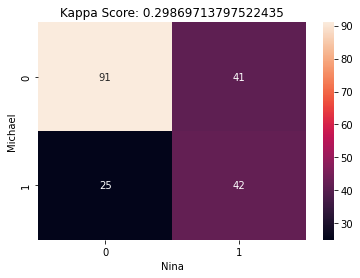

In [21]:
cm = confusion_matrix(merge_df['label_michael'], merge_df['label_nina'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
plt.title(f'Kappa Score: {kapp_score}')
ax.set_xlabel('Nina')
ax.set_ylabel('Michael')
plt.savefig(os.path.join(result_path, 'week3', 'michael&nina.png'), dpi=500)